In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [2]:

# Load the data from the CSV file
aranet4 = pd.read_csv('../datasets/aranet4.csv')
aranetExp = pd.read_csv('../datasets/aranetExp.csv')

# Convert the date column to datetime
aranetExp['date'] = pd.to_datetime(aranetExp['date'])
aranetExp = aranetExp.rename(columns={'date': 'Datetime'})
aranetExp = aranetExp.drop(columns=['id','time'])
aranetExp = aranetExp.set_index('Datetime')

# Convert the date column to datetime 
aranet4['Datetime'] = pd.to_datetime(aranet4['Datetime'])
aranet4 = aranet4.set_index('Datetime')

# Create a copy of aranetExp
aranetExp_copy = aranetExp.copy()

# Round the 'Datetime' index to the nearest minute
aranetExp_copy.index = aranetExp_copy.index.round('min')
# Ensure each record has a unique datetime to the minute
unique_minutes = set()
for i in range(len(aranetExp_copy)):
    current_time = aranetExp_copy.index[i]
    original_time = current_time
    while current_time in unique_minutes:
        print(f"Changing {current_time} to ", end="")
        current_time += pd.Timedelta(minutes=1)
        print(f"{current_time}")
    if current_time != original_time:
        print(f"Original time {original_time} changed to {current_time}")
    unique_minutes.add(current_time)
    aranetExp_copy.index.values[i] = current_time
    
def custom_round_to_nearest_minute(dt_index):
    rounded_index = dt_index.floor('min') + pd.to_timedelta((dt_index.second >= 30).astype(int), unit='min')
    rounded_index.name = dt_index.name  # Preserve the name of the index
    return rounded_index

# Create a copy of aranet4
aranet4_copy = aranet4.copy()

# Use the custom function to round the 'Datetime' index to the nearest minute
aranet4_copy.index = custom_round_to_nearest_minute(aranet4_copy.index)

# Merge aranet4_copy with aranetExp_copy using an exact match on the 'Datetime' index
merged = pd.merge(aranet4_copy, aranetExp_copy, left_on='Datetime', right_index=True, how='left')


aranet_tf = merged.copy()
aranet_tf['hour'] = aranet_tf.index.hour
aranet_tf['minute'] = aranet_tf.index.minute


aranet = aranet_tf.copy()

# Filter the DataFrame to include all records from "2024-03-14 00:00:00" onwards
aranet_filtered = aranet.loc["2024-03-14 00:00:00":]


# Define a function to label the time periods as a boolean
def label_song_lec(row):
    if row.name.dayofweek in [0, 1, 2, 3]:  # Monday to Thursday
        if row.name.time() >= pd.to_datetime('12:15').time() and row.name.time() <= pd.to_datetime('13:30').time():
            return True
    return False

# Apply the function to the DataFrame
aranet_filtered['song_lec'] = aranet_filtered.apply(label_song_lec, axis=1)

def label_chen_lec(row):
    if row.name.dayofweek in [0, 2]:  # Monday and Wednesday
        if row.name.time() >= pd.to_datetime('09:00').time() and row.name.time() <= pd.to_datetime('10:15').time():
            return True
    elif row.name.dayofweek in [1, 3]:  # Tuesday and Thursday
        if row.name.time() >= pd.to_datetime('08:00').time() and row.name.time() <= pd.to_datetime('09:15').time():
            return True
    return False

aranet_filtered['chen_lec'] = aranet_filtered.apply(label_chen_lec, axis=1)

filtered_lec_df = aranet_filtered[(aranet_filtered['song_lec'] == True) | (aranet_filtered['chen_lec'] == True)]

filtered_lec_df.info()

Changing 2024-03-13 13:08:00 to 2024-03-13 13:09:00
Original time 2024-03-13 13:08:00 changed to 2024-03-13 13:09:00
Changing 2024-03-18 12:25:00 to 2024-03-18 12:26:00
Original time 2024-03-18 12:25:00 changed to 2024-03-18 12:26:00
Changing 2024-03-18 12:26:00 to 2024-03-18 12:27:00
Original time 2024-03-18 12:26:00 changed to 2024-03-18 12:27:00
Changing 2024-03-19 09:18:00 to 2024-03-19 09:19:00
Original time 2024-03-19 09:18:00 changed to 2024-03-19 09:19:00
Changing 2024-03-25 10:18:00 to 2024-03-25 10:19:00
Original time 2024-03-25 10:18:00 changed to 2024-03-25 10:19:00
Changing 2024-04-02 12:34:00 to 2024-04-02 12:35:00
Original time 2024-04-02 12:34:00 changed to 2024-04-02 12:35:00
Changing 2024-04-04 12:30:00 to 2024-04-04 12:31:00
Original time 2024-04-04 12:30:00 changed to 2024-04-04 12:31:00
Changing 2024-04-08 12:31:00 to 2024-04-08 12:32:00
Original time 2024-04-08 12:31:00 changed to 2024-04-08 12:32:00
Changing 2024-04-08 12:32:00 to 2024-04-08 12:33:00
Original tim

C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_79716\1943374909.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aranet_filtered['song_lec'] = aranet_filtered.apply(label_song_lec, axis=1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2126 entries, 2024-03-14 08:00:00 to 2024-04-08 13:30:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon dioxide(ppm)        2126 non-null   int64  
 1   Temperature(°F)            2126 non-null   float64
 2   Relative humidity(%)       2126 non-null   float64
 3   Atmospheric pressure(hPa)  2126 non-null   float64
 4   door1                      160 non-null    object 
 5   door2                      160 non-null    object 
 6   hvac                       160 non-null    object 
 7   subject_count              160 non-null    float64
 8   hour                       2126 non-null   int64  
 9   minute                     2126 non-null   int64  
 10  song_lec                   2126 non-null   bool   
 11  chen_lec                   2126 non-null   bool   
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 186.9+ KB


C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_79716\1943374909.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aranet_filtered['chen_lec'] = aranet_filtered.apply(label_chen_lec, axis=1)


In [3]:
# Check if the specific minute is missing in filtered_lec_df
missing_time = '2024-03-26 08:43:00'
if missing_time in aranet.index:
    print(f"The record for {missing_time} is present in filtered_lec_df.")
else:
    print(f"The record for {missing_time} is missing in filtered_lec_df.")

The record for 2024-03-26 08:43:00 is missing in filtered_lec_df.


In [4]:

# Initialize variables
sliced_dataframes = {}
lecture_start_time = None
lecture_type = None
lecture_count = {'song': 0, 'chen': 0}

# Iterate through the DataFrame
for index, row in filtered_lec_df.iterrows():
    # Check if we are in a new lecture
    if lecture_start_time is None or (index - lecture_start_time).total_seconds() > 75 * 60 or (row['song_lec'] and lecture_type != 'song') or (row['chen_lec'] and lecture_type != 'chen'):
        # Store the previous lecture if it exists
        if lecture_start_time is not None:
            lecture_label = f"{lecture_type}_lec_{lecture_count[lecture_type]}"
            # Subtract one minute from the end index of the slice
            sliced_dataframes[lecture_label] = filtered_lec_df.loc[lecture_start_time:index - pd.Timedelta(minutes=1)]
        
        # Update the lecture start time and type
        lecture_start_time = index
        if row['song_lec']:
            lecture_type = 'song'
        elif row['chen_lec']:
            lecture_type = 'chen'
        lecture_count[lecture_type] += 1

# Store the last lecture
if lecture_start_time is not None:
    lecture_label = f"{lecture_type}_lec_{lecture_count[lecture_type]}"
    # Subtract one minute from the end index of the last slice
    sliced_dataframes[lecture_label] = filtered_lec_df.loc[lecture_start_time:index - pd.Timedelta(minutes=1)]

# Display the keys of the sliced dataframes
print(sliced_dataframes.keys())


# Impute missing values in each lecture slice
# Iterate over each key (lecture) in the dictionary
for lecture_key in sliced_dataframes.keys():
    # Forward fill to impute missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].ffill()

    # Backward fill to impute remaining missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].bfill()



# Check if any column in the DataFrame has 0 non-null values

# Copy the keys to a list to avoid RuntimeError for changing dict size during iteration
keys_to_check = list(sliced_dataframes.keys())

# Store the lectures that will be removed
removed_lectures = []

for lecture_key in keys_to_check:
    # Check if any column in the DataFrame has 0 non-null values
    if (sliced_dataframes[lecture_key].count() == 0).any():
        # If found, add to the list of lectures to remove and delete from dictionary
        removed_lectures.append(lecture_key)
        del sliced_dataframes[lecture_key]

# Print the lectures that were removed
print("Lectures removed due to 0 non-null counts in all columns:", removed_lectures)

# Define a function to fill missing minutes in the DataFrame
def fill_missing_minutes_in_lectures(sliced_dataframes):
    for lecture_key, df in sliced_dataframes.items():
        # Get the minute column as a Series
        minutes = df.index.minute
        
        # Find the difference between consecutive minutes
        minute_diffs = minutes.to_series().diff().fillna(1)  # Fill the first NaN with 1
        
        # Identify indices where the difference is greater than 1
        missing_minute_indices = minute_diffs[minute_diffs > 1].index
        
        # For each missing minute, add a new row with NaN values
        for idx in missing_minute_indices:
            missing_time = df.index[idx - 1] + pd.Timedelta(minutes=1)
            empty_row = pd.DataFrame({col: np.nan for col in df.columns}, index=[missing_time])
            df = pd.concat([df, empty_row])
            print(f"Empty record created for {lecture_key} at {missing_time}")
        
        # Sort the DataFrame after adding new rows to maintain chronological order
        sliced_dataframes[lecture_key] = df.sort_index()
        
    return sliced_dataframes

# Apply the function
sliced_dataframes = fill_missing_minutes_in_lectures(sliced_dataframes)

def ensure_song_lecture_endpoints(sliced_dataframes):
    for lecture_key, df in sliced_dataframes.items():
        if 'song_lec' in lecture_key:
            # Check if the start and end points are missing
            start_time = df.index.min().replace(hour=12, minute=15, second=0)
            end_time = df.index.max().replace(hour=13, minute=30, second=0)

            if df.index.min() != start_time:
                # Add a new row at the start time with NaN values
                df.loc[start_time] = [np.nan] * len(df.columns)
                print(f"Start record created for {lecture_key} at {start_time}")

            if df.index.max() != end_time:
                # Add a new row at the end time with NaN values
                df.loc[end_time] = [np.nan] * len(df.columns)
                print(f"End record created for {lecture_key} at {end_time}")

            # Sort the DataFrame after adding new rows to maintain chronological order
            sliced_dataframes[lecture_key] = df.sort_index()

    return sliced_dataframes

# Apply the function
sliced_dataframes = ensure_song_lecture_endpoints(sliced_dataframes)

# Impute missing values in each lecture slice
# Iterate over each key (lecture) in the dictionary
for lecture_key in sliced_dataframes.keys():
    # Forward fill to impute missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].ffill()

    # Backward fill to impute remaining missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].bfill()


dict_keys(['chen_lec_1', 'song_lec_1', 'chen_lec_2', 'song_lec_2', 'chen_lec_3', 'song_lec_3', 'chen_lec_4', 'song_lec_4', 'chen_lec_5', 'song_lec_5', 'chen_lec_6', 'song_lec_6', 'chen_lec_7', 'song_lec_7', 'chen_lec_8', 'song_lec_8', 'chen_lec_9', 'song_lec_9', 'chen_lec_10', 'song_lec_10', 'chen_lec_11', 'song_lec_11', 'chen_lec_12', 'song_lec_12', 'chen_lec_13', 'song_lec_13', 'chen_lec_14', 'song_lec_14'])
Lectures removed due to 0 non-null counts in all columns: ['chen_lec_5', 'song_lec_5', 'chen_lec_8', 'song_lec_8', 'chen_lec_9', 'song_lec_9', 'song_lec_10', 'chen_lec_11']
Empty record created for chen_lec_7 at 2024-03-26 08:45:00
End record created for song_lec_14 at 2024-04-08 13:30:00


C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_79716\168176722.py:80: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = pd.concat([df, empty_row])
C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_79716\168176722.py:105: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df.loc[end_time] = [np.nan] * len(df.columns)


In [12]:
# Print the length of the flattened arrays for each lecture
for lecture_key, df in sliced_dataframes.items():
    print(f"{lecture_key}: {len(df.values.flatten())}")


chen_lec_1: 912
song_lec_1: 912
chen_lec_2: 912
song_lec_2: 912
chen_lec_3: 912
song_lec_3: 912
chen_lec_4: 912
song_lec_4: 912
chen_lec_6: 912
song_lec_6: 912
chen_lec_7: 912
song_lec_7: 912
chen_lec_10: 912
song_lec_11: 912
chen_lec_12: 912
song_lec_12: 912


In [17]:
chen_lec_1 = sliced_dataframes['chen_lec_1']
chen_lec_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2024-03-14 08:00:00 to 2024-03-14 09:15:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon dioxide(ppm)        76 non-null     float64
 1   Temperature(°F)            76 non-null     float64
 2   Relative humidity(%)       76 non-null     float64
 3   Atmospheric pressure(hPa)  76 non-null     float64
 4   door1                      76 non-null     object 
 5   door2                      76 non-null     object 
 6   hvac                       76 non-null     object 
 7   subject_count              76 non-null     float64
 8   hour                       76 non-null     int64  
 9   minute                     76 non-null     int64  
 10  song_lec                   76 non-null     bool   
 11  chen_lec                   76 non-null     bool   
dtypes: bool(2), float64(5), int64(2), object(3)
memory usage: 6.7+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder


# Assuming 'sliced_dataframes' is a dictionary with your dataframes
required_columns = ['Carbon dioxide(ppm)', 'door1', 'door2', 'hvac', 'song_lec', 'chen_lec']

# Initialize an empty list to store the subsetted dataframes
subsets = []

# Loop through each dataframe and concatenate the required columns
for key, df in sliced_dataframes.items():
    # Reset index for each lecture to get a count starting from 0 for 'lecture_min'
    subset = df[required_columns].reset_index(drop=True)
    # Create a 'lecture_min' column that enumerates each record in the lecture
    subset['lecture_min'] = subset.index
    subsets.append(subset)

# Concatenate all the subsets into one dataframe
combined_df = pd.concat(subsets)

# Encode the categorical features with LabelEncoder
label_encoder = LabelEncoder()
for column in ['door1', 'door2', 'hvac']:
    combined_df[column] = label_encoder.fit_transform(combined_df[column])

# Map 'chen_lec' to lecture labels and drop 'song_lec'
combined_df['lecture'] = combined_df['chen_lec'].map({1: 'Chen Lecture', 0: 'Song Lecture'})
combined_df.drop(['song_lec', 'chen_lec'], axis=1, inplace=True)

# Now 'combined_df' contains the prepared features from all the relevant dataframes with 'lecture_min' column reset for each lecture




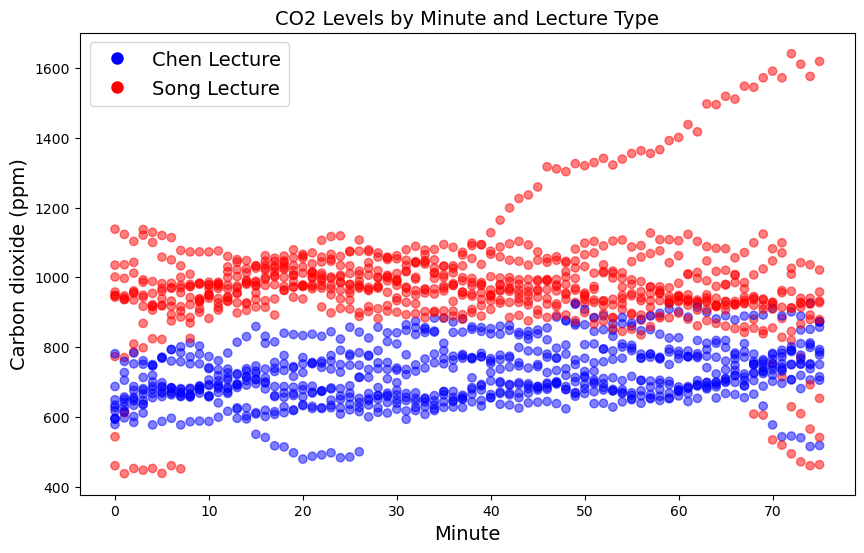

In [6]:
# Create a color map based on the 'lecture' column
color_map = {'Chen Lecture': 'blue', 'Song Lecture': 'red'}
colors = combined_df['lecture'].map(color_map)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['lecture_min'], combined_df['Carbon dioxide(ppm)'], c=colors, alpha=0.5)
plt.xlabel('Minute')
plt.ylabel('Carbon dioxide (ppm)')
plt.title('CO2 Levels by Minute and Lecture Type')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Chen Lecture'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Song Lecture')])
plt.show()


In [7]:
# Assuming 'combined_df' is already loaded and contains the required data
# Use pd.get_dummies to encode 'lecture' and drop the original 'lecture' column
combined_df = pd.get_dummies(combined_df, columns=['lecture'], drop_first=True)

# Rename the dummy column for clarity
combined_df.rename(columns={'lecture_Song Lecture': 'is_Song_lecture'}, inplace=True)

In [8]:
co2_exp = combined_df.copy()
co2_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 75
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Carbon dioxide(ppm)  1520 non-null   float64
 1   door1                1520 non-null   int32  
 2   door2                1520 non-null   int32  
 3   hvac                 1520 non-null   int32  
 4   lecture_min          1520 non-null   int64  
 5   is_Song_lecture      1520 non-null   uint8  
dtypes: float64(1), int32(3), int64(1), uint8(1)
memory usage: 54.9 KB


In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(co2_exp.drop('is_Song_lecture', axis=1))
scaled_features = scalar.transform(co2_exp.drop('is_Song_lecture', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=co2_exp.columns[:-1])
df_feat.head()

,Carbon dioxide(ppm),door1,door2,hvac,lecture_min
0,-1.461942,0.536783,0.576337,1.66204,-1.709409
1,-1.450468,0.536783,0.576337,1.66204,-1.663824
2,-1.525047,0.536783,0.576337,-0.60167,-1.618240
3,-1.370151,0.536783,0.576337,-0.60167,-1.572656
4,-1.565206,0.536783,0.576337,-0.60167,-1.527072


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, co2_exp['is_Song_lecture'], test_size=0.30)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

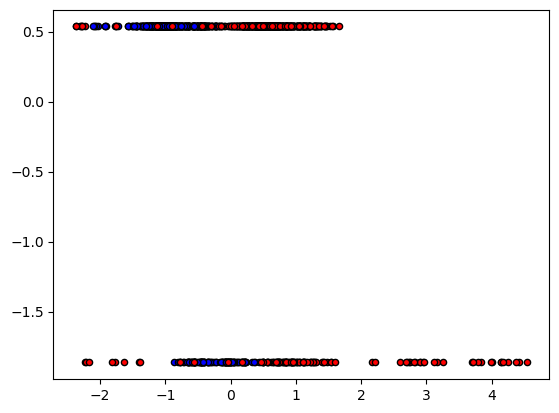

In [17]:
def plot_samples():
    # Plot also the training points
    colors = "bry"
    for i, color in zip(np.unique(y), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                        edgecolor='black', s=20)
plot_samples()

def plot_devision_bounday(classifier):
    # create a mesh to plot in
    h = .10  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)")
    plt.axis('tight')
    plot_samples()

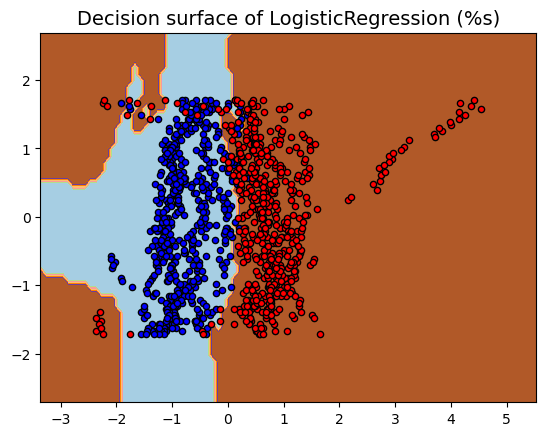

In [23]:
# Assuming X_train and y_train are your training data and labels
X, y = np.hstack((X_train[:, 0:1], X_train[:, -1:])) , y_train  # Use the first and the last column

knn7 = KNeighborsClassifier(n_neighbors=7).fit(X, y)
plot_devision_bounday(knn7)
# plot_devision_bounday(knn)

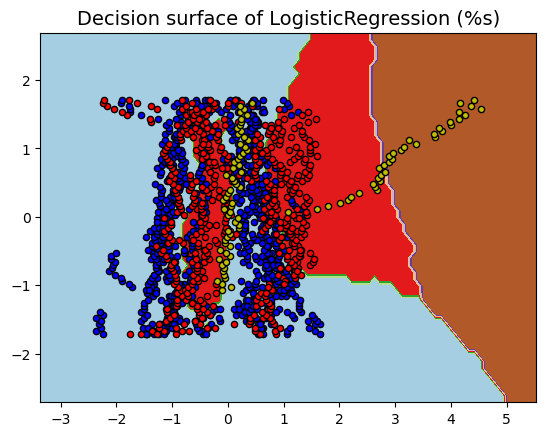

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'scaled_features' is a numpy array and you know the column names
column_names = ['Carbon dioxide(ppm)', 'door1', 'door2', 'hvac', 'lecture_min']
scaled_features_df = pd.DataFrame(scaled_features, columns=column_names)

# Now you can select columns using their names
X = scaled_features_df[['Carbon dioxide(ppm)', 'lecture_min']].to_numpy()

# Assuming 'co2_exp' is your DataFrame
co2_exp['door_status'] = (co2_exp['door1'] + co2_exp['door2']).apply(lambda x: 'open' if x == 0 else ('half-open' if x == 1 else 'closed'))

# Convert 'door_status' to categorical type
co2_exp['door_status'] = pd.Categorical(co2_exp['door_status'], categories=['open', 'half-open', 'closed'], ordered=True)

y = co2_exp['door_status']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train the KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=40).fit(X_train, y_train)
# knn_model.fit(X_train, y_train)

# You can now use knn_model to make predictions and evaluate the model
plot_devision_bounday(knn_model)

In [21]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test, pred))

[[181   2]
 [  0 182]]


In [24]:
error_rate = []

# Will take some time
for i in range(1,40):
    # create a knn classifier with n_neighbors equals i
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # calculate the error rate and append to the error_rate list
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
error_rate

[0.005479452054794521,
 0.0027397260273972603,
 0.0027397260273972603,
 0.0027397260273972603,
 0.0027397260273972603,
 0.0027397260273972603,
 0.0027397260273972603,
 0.0027397260273972603,
 0.0027397260273972603,
 0.00821917808219178,
 0.00821917808219178,
 0.024657534246575342,
 0.021917808219178082,
 0.024657534246575342,
 0.024657534246575342,
 0.024657534246575342,
 0.024657534246575342,
 0.024657534246575342,
 0.021917808219178082,
 0.049315068493150684,
 0.049315068493150684,
 0.049315068493150684,
 0.049315068493150684,
 0.049315068493150684,
 0.049315068493150684,
 0.0547945205479452,
 0.024657534246575342,
 0.03287671232876712,
 0.030136986301369864,
 0.0410958904109589,
 0.0410958904109589,
 0.043835616438356165,
 0.043835616438356165,
 0.043835616438356165,
 0.043835616438356165,
 0.043835616438356165,
 0.0410958904109589,
 0.04657534246575343,
 0.049315068493150684]

Text(0, 0.5, 'Error Rate')

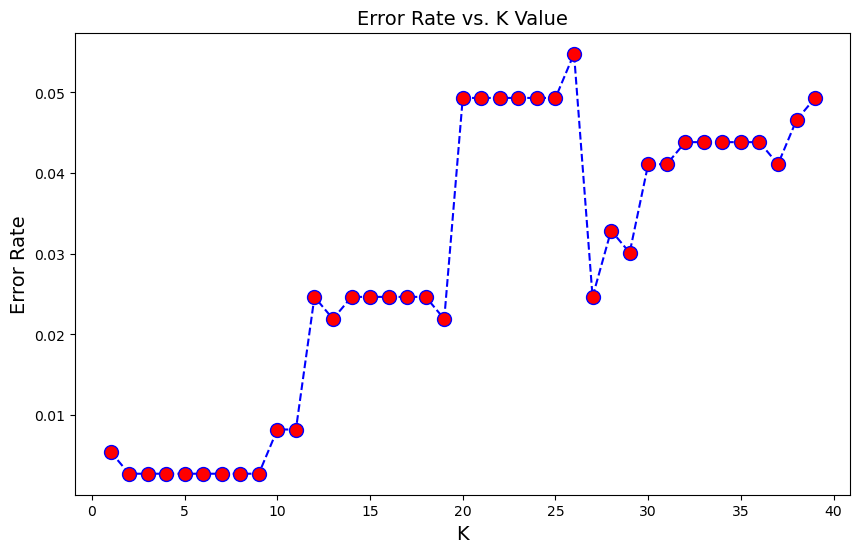

In [26]:
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Any k < 40 will keep the error rate below 0.06,

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[181   2]
 [  0 182]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       183
           1       0.99      1.00      0.99       182

    accuracy                           0.99       365
   macro avg       0.99      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365



In [28]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[183   0]
 [ 18 164]]


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       183
           1       1.00      0.90      0.95       182

    accuracy                           0.95       365
   macro avg       0.96      0.95      0.95       365
weighted avg       0.96      0.95      0.95       365



In [29]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[181   2]
 [ 16 166]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       183
           1       0.99      0.91      0.95       182

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



# Support Vector Machines

## Linear SCV

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [31]:
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [32]:
pred = svm_clf.predict(X_test)
pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [33]:
decision = svm_clf.decision_function(X_test)
decision

array([-0.52860644,  0.68333301, -1.1017863 ,  1.01322863,  0.86622779,
       -0.20894164, -0.36147097, -0.354077  , -0.79178974, -1.10710831,
       -0.59330799, -0.33341066,  0.54792469,  1.29557279,  0.79880612,
       -0.79488517,  0.59651224, -0.63730996,  0.84344358,  0.50676108,
        1.48009658, -0.97179116,  0.75028266, -0.95880698,  1.07898311,
        0.61496551,  1.82489509,  0.64264319, -0.64925716, -0.3371966 ,
        1.51534527,  1.35826359, -0.5695336 , -0.86652824, -0.40284487,
       -1.16202984,  0.56564064,  0.94060138,  1.06061328, -0.76079903,
        1.1429658 ,  0.66580761, -1.49484385, -1.18103606, -0.49297689,
       -1.56866448,  1.37513132, -0.42410057,  1.0594778 , -1.80169972,
        0.95096394, -1.08264984, -1.20946218,  0.70745274,  2.15981835,
       -1.35152097,  0.43058612, -0.67705395, -0.69574279, -0.3637761 ,
        0.56195408,  1.43588434, -0.48111379, -0.75748777,  1.08076853,
       -0.82074264,  1.2470764 , -0.57580321, -0.38075184, -0.70

In [36]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

C:\Users\Corey Dearing\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

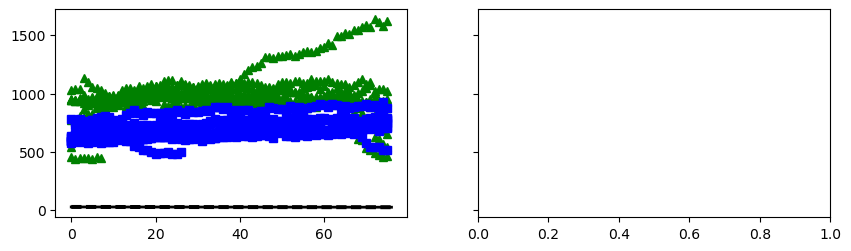

In [47]:
# extra code – this cell generates and saves Figure 5–4

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)
y = co2_exp['is_Song_lecture'].copy()
X = co2_exp.drop('is_Song_lecture', axis=1).copy()


scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# Let's assume the names of the columns you want to plot are 'feature1' and 'feature2'.
# You should replace 'feature1' and 'feature2' with the actual names of your DataFrame's columns.
feature1 = 'lecture_min'  # Replace with your actual column name
feature2 = 'Carbon dioxide(ppm)'  # Replace with your actual column name

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Plot for C=1
plt.sca(axes[0])
plt.plot(X[feature1][y==1], X[feature2][y==1], "g^", label="Chen Lecture")
plt.plot(X[feature1][y==0], X[feature2][y==0], "bs", label="Song Lecture")
# plot_svc_decision_boundary function needs to be defined, or you need to replace its call with appropriate plotting code.
plot_svc_decision_boundary(svm_clf1, 0, 76)  # Make sure this function is defined correctly.
plt.xlabel("Lecture Duration")
plt.ylabel("CO2 Level (ppm)")
plt.legend(loc="upper left")
plt.title(f"C = 1")
plt.axis([0, 75, 400, 1700])
plt.grid()

# Plot for C=100
plt.sca(axes[1])
plt.plot(X[feature1][y==1], X[feature2][y==1], "g^")
plt.plot(X[feature1][y==0], X[feature2][y==0], "bs")
# plot_svc_decision_boundary(svm_clf2, 0, 76)  # Make sure this function is defined correctly.
plt.xlabel("Lecture Duration")
plt.title(f"C = 100")
plt.axis([0, 75, 400, 1700])
plt.grid()

plt.show()

In [44]:
X.head()

,Carbon dioxide(ppm),door1,door2,hvac,lecture_min
0,595.0,1,1,1,0
1,597.0,1,1,1,1
2,584.0,1,1,0,2
3,611.0,1,1,0,3
4,577.0,1,1,0,4
